# Google Colab Lab Assignment -Pretrained Model

---



**Course Name:** Deep Learning Lab

**Lab Title:** Research Paper Implementation with Pre-trained Model (Deep Convolutional Neural Networks for Cotton Leaf Disease Detection)

**Student Name:** Pranjal Lohia

**Student ID:** 202201070022

**Date of Submission:** 13 April 2025

**Github link:** https://github.com/pranjal20lohia/Pretrained-Model-cotton-disease.git

**Group Members**: Gayatri Mene and Divya Dhokale


---



**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

Research Paper Link:- https://www.sciencedirect.com/science/article/pii/S2667305323001035

Dataset Link:- https://www.kaggle.com/datasets/ataher/cotton-leaf-disease-dataset

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "pranjallohia20" # username from the json file
os.environ['KAGGLE_KEY'] ="218045eb31a6cc636089fccfab0e5daf" # key from the json file

!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset --force

403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
!unzip plant-disease-recognition-dataset.zip

Archive:  plant-disease-recognition-dataset.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: Test/Test/Healthy/8e8470687be37378.jpg  
  inflating: Test/Test/Healthy/8e858c8397706b7b.jpg  
  inflating: Test/Test/Healthy/8e8

In [ ]:
train_dir = '/content/Train/Train'
test_dir = '/content/Test/Test'
val_dir = '/content/Validation/Validation'

**Resnet**

In [ ]:
IMG_SIZE = (224, 224)  # Required for ResNet50
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Multiclass classification
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Create the final model
model_resnet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


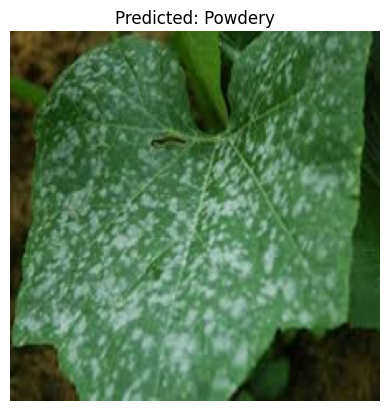

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Upload an image from your local system
uploaded = files.upload()

# Get class indices from your train_data generator
# Invert the dictionary to map index -> class name
class_indices = train_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}

# Preprocess and predict
for file_name in uploaded.keys():
    img_path = file_name
    img = Image.open(img_path).convert('RGB')
    img = img.resize((224, 224))  # Required size for ResNet50
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalization

    # Predict using the trained model
    prediction = model_resnet.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    # Display image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()


In [ ]:
import joblib

# Save model using joblib (creates a .pkl file)
joblib.dump(model_re snet, 'resnet_model.pkl')


['resnet_model.pkl']

In [ ]:
model_resnet = joblib.load('resnet_model.pkl')


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Model Summary
model_resnet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
EPOCHS = 10

history_resnet = model_resnet.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 319s 7s/step - accuracy: 0.3451 - loss: 1.2071 - val_accuracy: 0.4000 - val_loss: 1.0931
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 296s 7s/step - accuracy: 0.3320 - loss: 1.1613 - val_accuracy: 0.4000 - val_loss: 1.0881
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 296s 7s/step - accuracy: 0.3404 - loss: 1.1372 - val_accuracy: 0.4000 - val_loss: 1.0861
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 298s 7s/step - accuracy: 0.3535 - loss: 1.1148 - val_accuracy: 0.3833 - val_loss: 1.0745
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 298s 7s/step - accuracy: 0.3600 - loss: 1.1114 - val_accuracy: 0.3667 - val_loss: 1.0671
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 293s 7s/step - accuracy: 0.3523 - loss: 1.1006 - val_accuracy: 0.4667 - val_loss: 1.0646
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 325s 7s/step - accuracy: 0.3717 - loss: 1.0894 - val_accuracy: 0.3333 - val_loss: 1.0742
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 291s 7s/step - accuracy: 0.3582 - loss: 1.0900 - val_accuracy: 0.4167 - v

In [ ]:
test_loss, test_acc = model_resnet.evaluate(test_data)
print(f"ResNet50 Test Accuracy: {test_acc*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.4657 - loss: 1.0485
ResNet50 Test Accuracy: 38.67%


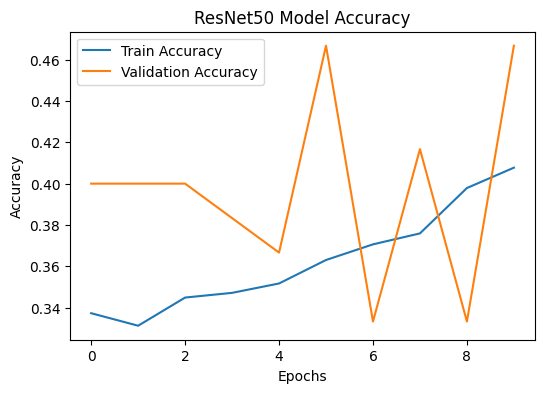

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet50 Model Accuracy')
plt.show()

**VGG16 Model**

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x)  # Flatten the feature maps
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Create the final model
model_vgg = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
EPOCHS = 10

history_vgg = model_vgg.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 789s 19s/step - accuracy: 0.9222 - loss: 0.2111 - val_accuracy: 0.9833 - val_loss: 0.1565
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 783s 19s/step - accuracy: 0.9391 - loss: 0.1724 - val_accuracy: 0.9500 - val_loss: 0.1696
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 784s 19s/step - accuracy: 0.9406 - loss: 0.1726 - val_accuracy: 0.9667 - val_loss: 0.1294
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 786s 19s/step - accuracy: 0.9326 - loss: 0.1866 - val_accuracy: 0.9333 - val_loss: 0.1591
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 785s 19s/step - accuracy: 0.9436 - loss: 0.1518 - val_accuracy: 0.9167 - val_loss: 0.1377
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 783s 19s/step - accuracy: 0.9340 - loss: 0.1859 - val_accuracy: 0.9667 - val_loss: 0.1166
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 784s 19s/step - accuracy: 0.9381 - loss: 0.1743 - val_accuracy: 0.9500 - val_loss: 0.1280
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 784s 19s/step - accuracy: 0.9405 - loss: 0.1605 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model_vgg.evaluate(test_data)
print(f"VGG16 Test Accuracy: {test_acc*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 16s/step - accuracy: 0.8964 - loss: 0.3361
VGG16 Test Accuracy: 90.00%


In [ ]:
# Model Summary
model_resnet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,375,691 (92.99 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 525,320 (2.00 MB)

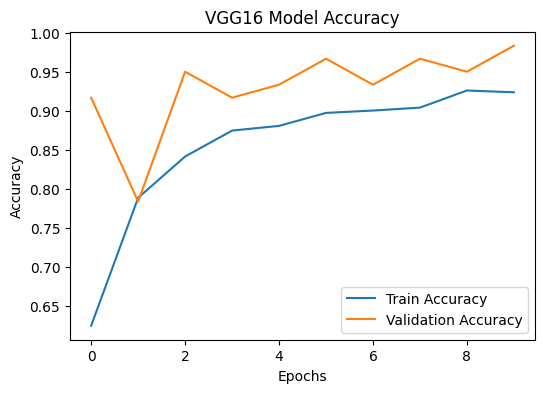

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('VGG16 Model Accuracy')
plt.show()

**EfficientNet**

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling instead of flatten
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Create the final model
model_effnet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_effnet.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
EPOCHS = 3

history_effnet = model_effnet.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

Epoch 1/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.3384 - loss: 1.1232 - val_accuracy: 0.3333 - val_loss: 1.1030
Epoch 2/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.3295 - loss: 1.1173 - val_accuracy: 0.3333 - val_loss: 1.1091
Epoch 3/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.3434 - loss: 1.1092 - val_accuracy: 0.3333 - val_loss: 1.1103


In [ ]:
# Model Summary
model_resnet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,375,691 (92.99 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 525,320 (2.00 MB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5599 - loss: 1.0316
EfficientNet Test Accuracy: 33.33%


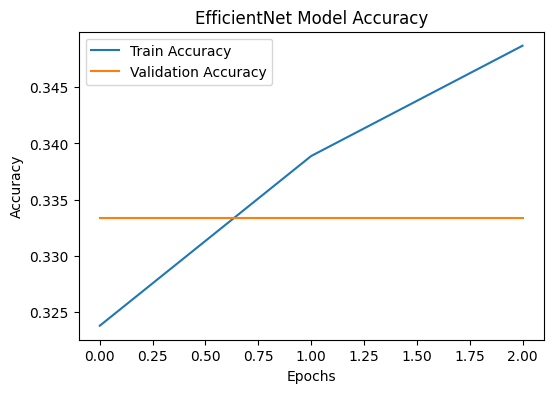

In [ ]:
test_loss, test_acc = model_effnet.evaluate(test_data)
print(f"EfficientNet Test Accuracy: {test_acc*100:.2f}%")

plt.figure(figsize=(6,4))
plt.plot(history_effnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_effnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('EfficientNet Model Accuracy')
plt.show()

## **Conclusion and Result Visulaization**

**Declaration**

I, Pranjal Lohia, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account.

Signature: Pranjal Lohia